## Importing Libraries

In [127]:
import tensorflow
import tensorflow.keras 
import pandas as pd
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading dataset from Keras : MNIST Dataset

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Sample Images from Dataset

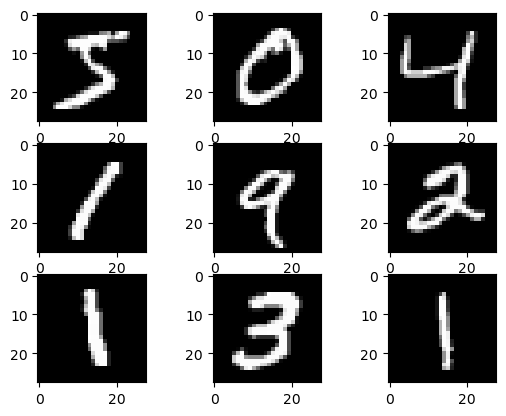

In [16]:
for i in range(9):
 
 plt.subplot(300 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## Normalizing Image to range between 0 and 1

In [17]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Reshaping the image to a single channel

In [18]:
x_train = x_train.reshape((x_train.shape[0], 28,28, 1))
x_test = x_test.reshape((x_test.shape[0], 28,28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Creating the CNN Model

In [115]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=(2,2), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation ='softmax'))
optimizer = SGD(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [116]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 32)        8224      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 800)               0         
                                                                 
 dense_45 (Dense)            (None, 128)             

## Training the model

In [117]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)

In [118]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test),callbacks = [es])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5780 - accuracy: 0.8259 - val_loss: 0.1784 - val_accuracy: 0.9467
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1516 - accuracy: 0.9552 - val_loss: 0.1229 - val_accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1030 - accuracy: 0.9685 - val_loss: 0.0797 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0649 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0713 - accuracy: 0.9784 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0539 -

## Testing the model

In [119]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0433 - accuracy: 0.9865
Test Loss: 0.04329140484333038
Test Accuracy: 0.9865000247955322


## Results

## 1) Validation Loss and Accuracy Plot

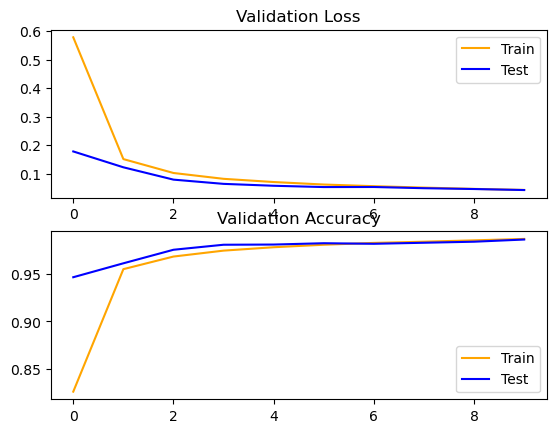

In [135]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Validation Loss')
plt.plot(history.history['loss'], color='orange', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Test')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Test')
plt.legend()
plt.show()

## 2) Confusion Matrix

313/313 [==============================] - 2s 5ms/step


<AxesSubplot:>

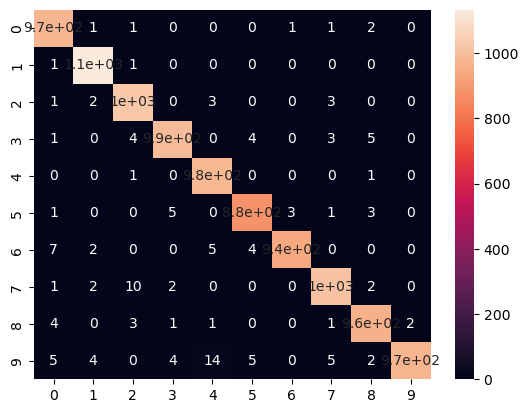

In [136]:
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cf_matrix, annot=True)

In [128]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

